In [13]:
import scipy.io as sio
from scipy import signal
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean
from sklearn.metrics import mean_squared_error as mse
import os
import numpy as np

from sklearn import preprocessing
from tftb.processing import Scalogram
from tftb.generators import fmconst
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
current = sio.loadmat('../../datasets/CS2018_12_14/Current.mat')
voltage = sio.loadmat('../../datasets/CS2018_12_14/Voltage.mat')
stator_plus = sio.loadmat('../../datasets/CS2018_12_14/StatorPuls.mat')
speed = sio.loadmat('../../datasets/CS2018_12_14/Speed.mat')
torque = sio.loadmat('../../datasets/CS2018_12_14/Torque.mat')

In [38]:
dataset = np.hstack((voltage['Voltage'], stator_plus['StatorPuls'], speed['Speed'], current['Current'], torque['Torque']))
dataset.shape

(240001, 7)

In [39]:
print (np.amin(dataset, axis=0))
print (np.amax(dataset, axis=0))
print (np.mean(dataset, axis=0))
print (np.std(dataset, axis=0))
print (np.var(dataset, axis=0))

[ 0.          0.          0.          0.          0.         -0.84480167
 -1.70140278]
[ 15.         298.45130209 314.15926536 302.85683286  11.68904866
  19.79539008  47.60511357]
[ 14.9999375  127.27065373 133.97107006 125.96364441   6.25359459
   6.50882367  17.71057947]
[3.06184942e-02 7.68210058e+01 8.08615597e+01 7.84008594e+01
 1.54053534e+00 4.23019674e+00 1.02232311e+01]
[9.37492188e-04 5.90146694e+03 6.53859184e+03 6.14669476e+03
 2.37324913e+00 1.78945645e+01 1.04514454e+02]


In [40]:

current['Current'].shape, voltage['Voltage'].shape, stator_plus['StatorPuls'].shape, speed['Speed'].shape, torque['Torque'].shape

((240001, 2), (240001, 2), (240001, 1), (240001, 1), (240001, 1))

In [41]:
current1_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
current1_scaler.fit(dataset[:,4:5])

current2_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
current2_scaler.fit(dataset[:,5:6])

torque_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
torque_scaler.fit(dataset[:,6:7])

voltage1_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
voltage1_scaler.fit(dataset[:,0:1])

voltage2_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
voltage2_scaler.fit(dataset[:,1:2])

statorpuls_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
statorpuls_scaler.fit(dataset[:,2:3])

speed_scaler = preprocessing.MinMaxScaler(feature_range=[0,1])
speed_scaler.fit(dataset[:,3:4])

MinMaxScaler(copy=True, feature_range=[0, 1])

In [19]:
result = np.load('../../datasets/results_npy/SE_data_cnn100_out.npy')

In [72]:
current1_pred = result[0]
current1_true = result[1]
current2_pred = result[2]
current2_true = result[3]
torque_pred = result[4]
torque_true = result[5]

c1_p = current1_scaler.inverse_transform(current1_pred).flatten()
c1_t = current1_scaler.inverse_transform(current1_true).flatten()
c2_p = current1_scaler.inverse_transform(current2_pred).flatten()
c2_t = current1_scaler.inverse_transform(current2_true).flatten()
t_p = current1_scaler.inverse_transform(torque_pred).flatten()
t_t = current1_scaler.inverse_transform(torque_true).flatten()

In [77]:
st = 0
en = 200
start = int(st / 0.005)
end = int(en / 0.005)
print (start, end)

0 40000


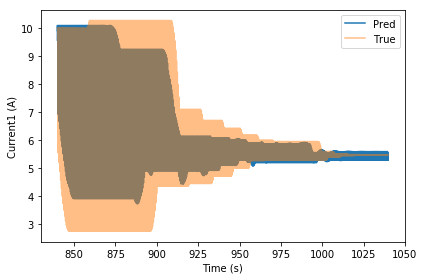

In [78]:

plt.plot(time[start:end], c1_p[start:end], label='Pred')
plt.plot(time[start:end], c1_t[start:end], label='True', alpha=0.5)
plt.legend()
plt.ylabel('Current1 (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../../docs/pres2/images/cnn_current1_pred_vs_time' + str(st) + '_' + str(en) + '.pdf',dpi=500,quality=100)


In [71]:
c1_p.shape

(71971, 100)

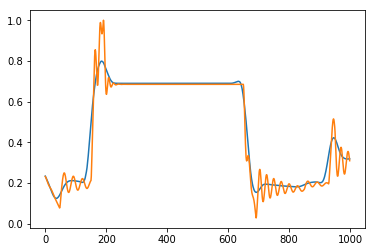

In [8]:
plt.plot(result[2,1000:2000])
plt.plot(result[3,1000:2000])

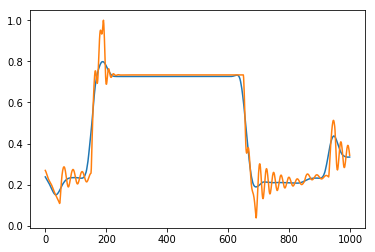

In [9]:
plt.plot(result[4,1000:2000])
plt.plot(result[5,1000:2000])

In [10]:
result = np.load('../datasets/results_npy/SE_data_dcnn100_out.npy')
start = 2000
end = 3000

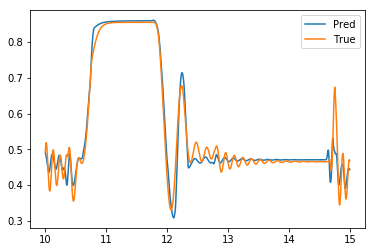

In [11]:
x = [x * 0.005 for x in range(start, end)]
plt.plot(x, result[0,start:end], label='Pred')
plt.plot(x, result[1,start:end], label='True')
plt.legend()


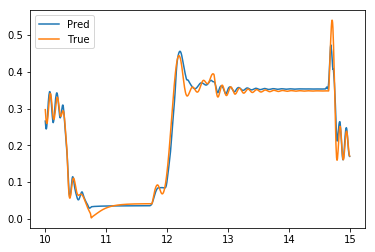

In [12]:

plt.plot(x, result[2,start:end], label='Pred')
plt.plot(x, result[3,start:end], label='True')
plt.legend()

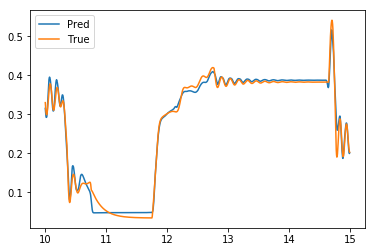

In [13]:

plt.plot(x, result[4,start:end], label='Pred')
plt.plot(x, result[5,start:end], label='True')
plt.legend()

In [14]:
result = np.load('../datasets/results_npy/SE_data_relu_dcnn100_out.npy')
start = 0
end = 1000

In [15]:
x = result[-1,start:end]

In [16]:

plt.plot(x, current1_scaler.inverse_transform(result[0:1,start:end]).flatten(), label='Pred')
plt.plot(x, current1_scaler.inverse_transform(result[1:2,start:end]).flatten(), label='True')
plt.legend()
plt.ylabel('Current1')
plt.xlabel('Time(s)')
plt.savefig('current1_vs_time.pdf',dpi=500)

ValueError: Found array with dim 3. Estimator expected <= 2.

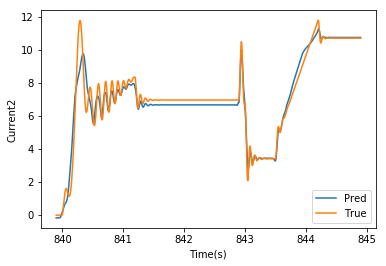

In [14]:
plt.plot(x, current2_scaler.inverse_transform(result[2:3,start:end]).flatten(), label='Pred')
plt.plot(x, current2_scaler.inverse_transform(result[3:4,start:end]).flatten(), label='True')
plt.legend()
plt.ylabel('Current2')
plt.xlabel('Time(s)')
plt.savefig('current2_vs_time.pdf',dpi=500)

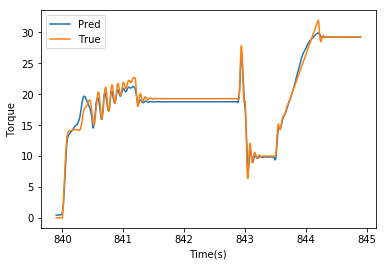

In [15]:
plt.plot(x, torque_scaler.inverse_transform(result[4:5,start:end]).flatten(), label='Pred')
plt.plot(x, torque_scaler.inverse_transform(result[5:6,start:end]).flatten(), label='True')
plt.legend()
plt.ylabel('Torque')
plt.xlabel('Time(s)')
plt.savefig('torque_vs_time.pdf',dpi=500)

In [203]:
# result = np.load('../../datasets/results_npy/SE_data_relu_dcnn100_out.npy')
# result = np.load('../../datasets/results_npy/SE_data_relu_dcnn_4layers100_out.npy')
result = np.load('../../datasets/results_npy/SE_data_combined_relu_dcnn_4layers100_out.npy')

In [204]:
smooth = False

In [205]:
current1_pred = result[0]
current1_true = result[1]
current2_pred = result[2]
current2_true = result[3]
torque_pred = result[4]
torque_true = result[5]

voltage1_true = result[6]
voltage2_true = result[7]
statorpuls_true = result[8]
speed_true = result[9]

if smooth:
    time = np.arange(result[-1][0][0], result[-1][-1][-1], 0.005)
    c1_true = [None for x in range(time.shape[0])]
    c1_pred = [None for x in range(time.shape[0])]
    c2_true = [None for x in range(time.shape[0])]
    c2_pred = [None for x in range(time.shape[0])]
    t_true = [None for x in range(time.shape[0])]
    t_pred = [None for x in range(time.shape[0])]

    for i in range(current1_true.shape[0]):
        for j in range(current1_true[i].shape[0]):
            c1_true[i+j] = current1_true[i,j]

    for i in range(current1_pred.shape[0]):
        for j in range(current1_pred[i].shape[0]):
            if not c1_pred[i+j]:
                c1_pred[i+j] = current1_pred[i,j]
            else:
                c1_pred[i+j] = (c1_pred[i+j] + current1_pred[i,j]) / 2

    for i in range(current2_true.shape[0]):
        for j in range(current2_true[i].shape[0]):
            c2_true[i+j] = current2_true[i,j]

    for i in range(current2_pred.shape[0]):
        for j in range(current2_pred[i].shape[0]):
            if not c2_pred[i+j]:
                c2_pred[i+j] = current2_pred[i,j]
            else:
                c2_pred[i+j] = (c2_pred[i+j] + current2_pred[i,j]) / 2

    for i in range(torque_true.shape[0]):
        for j in range(torque_true[i].shape[0]):
            t_true[i+j] = torque_true[i,j]

    for i in range(torque_pred.shape[0]):
        for j in range(torque_pred[i].shape[0]):
            if not t_pred[i+j]:
                t_pred[i+j] = torque_pred[i,j]
            else:
                t_pred[i+j] = (t_pred[i+j] + torque_pred[i,j]) / 2

else:
    time = []
    c1_true = []
    c1_pred = []
    c2_true = []
    c2_pred = []
    t_true = []
    t_pred = []
    
    v1_true = []
    v2_true = []
    sp_true = []
    s_true = []
    
    loc = 50
    
    for i in range(result.shape[1]):
        time.append(result[-1][i][loc])
        c1_true.append(current1_true[i][loc])
        c1_pred.append(current1_pred[i][loc])
        c2_true.append(current2_true[i][loc])
        c2_pred.append(current2_pred[i][loc])
        t_true.append(torque_true[i][loc])
        t_pred.append(torque_pred[i][loc])
        
        v1_true.append(voltage1_true[i][loc])
        v2_true.append(voltage2_true[i][loc])
        sp_true.append(statorpuls_true[i][loc])
        s_true.append(speed_true[i][loc])


In [206]:
c1_pred = current1_scaler.inverse_transform(np.asarray([c1_pred])).flatten()
c1_true = current1_scaler.inverse_transform(np.asarray([c1_true])).flatten()

c2_pred = current2_scaler.inverse_transform(np.asarray([c2_pred])).flatten()
c2_true = current2_scaler.inverse_transform(np.asarray([c2_true])).flatten()

t_pred = torque_scaler.inverse_transform(np.asarray([t_pred])).flatten()
t_true = torque_scaler.inverse_transform(np.asarray([t_true])).flatten()

v1_true = voltage1_scaler.inverse_transform(np.asarray([v1_true])).flatten()
v2_true = voltage2_scaler.inverse_transform(np.asarray([v2_true])).flatten()
sp_true = statorpuls_scaler.inverse_transform(np.asarray([sp_true])).flatten()
s_true = speed_scaler.inverse_transform(np.asarray([s_true])).flatten()

In [207]:
c1_corr = signal.correlate(c1_pred, c1_true)
c2_corr = signal.correlate(c2_pred, c2_true)
t_corr = signal.correlate(t_pred, t_true)

/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


In [208]:
c1_pear = pearsonr(c1_true, c1_pred)
c2_pear = pearsonr(c2_true, c2_pred)
t_pear = pearsonr(t_true, t_pred)
print (c1_pear, c2_pear, t_pear)

(0.9830041288050344, 0.0) (0.9949586808485268, 0.0) (0.9964251694752633, 0.0)


In [209]:
model = 'enddec2'


In [210]:
# def CID(t, p):
#     ed = euclidean(t,p)
#     ce_t = (sum([(t[i+1]-t[i])**2 for i in range(len(t)-1)]))**0.5
#     ce_p = (sum([(p[i+1]-p[i])**2 for i in range(len(p)-1)]))**0.5
#     cf = max(ce_t, ce_p) / min(ce_t, ce_p)
#     return ed * cf

# print (CID(c1_true[start:end], c1_pred[start:end]), CID(c2_true[start:end], c2_pred[start:end]), CID(t_true[start:end], t_pred[start:end]))
# print ('current1 : ', mse(c1_true[start:end], c1_pred[start:end]), 'current2 : ', mse(c2_true[start:end], c2_pred[start:end]), 'torque : ', mse(t_true[start:end], t_pred[start:end]))
# print ('current1 : ', euclidean(c1_true[start:end], c1_pred[start:end]), 'current2 : ', euclidean(c2_true[start:end], c2_pred[start:end]), 'torque : ', euclidean(t_true[start:end], t_pred[start:end]))

for time_gap in [[0,-0.005],[0,24],[0,12],[0,2],[2,4],[4,6],[6,8],[8,10],[10,12]]:
    st = time_gap[0]
    en = time_gap[1]
    start = int(st / 0.005)
    end = int(en / 0.005)
    
    print (round(mse(c1_true[start:end], c1_pred[start:end]),4), '&', round(euclidean(c1_true[start:end], c1_pred[start:end]),4), '&', \
           round(mse(c2_true[start:end], c2_pred[start:end]),4), '&', round(euclidean(c2_true[start:end], c2_pred[start:end]),4), '&', \
            round(mse(t_true[start:end], t_pred[start:end]),4), '&', round(euclidean(t_true[start:end], t_pred[start:end]),4))


    plt.plot(time[start:end], c1_pred[start:end], label='Pred')
    plt.plot(time[start:end], c1_true[start:end], label='True', alpha=0.5)
    plt.legend()
    plt.ylabel('Current1 (A)')
    plt.xlabel('Time (s)')
    plt.tight_layout()
    plt.savefig('../../docs/pres2/images/'+ model +'_current1_pred_vs_time' + str(st) + '_' + str(en) + '.pdf',dpi=500,quality=100)
    plt.close()

    plt.plot(time[start:end], c2_pred[start:end], label='Pred')
    plt.plot(time[start:end], c2_true[start:end], label='True', alpha=0.5)
    plt.legend()
    plt.ylabel('Current2 (A)')
    plt.xlabel('Time (s)')
    plt.tight_layout()
    plt.savefig('../../docs/pres2/images/'+ model +'_current2_pred_vs_time' + str(st) + '_' + str(en) + '.pdf',dpi=500,quality=100)
    plt.close()

    plt.plot(time[start:end], t_pred[start:end], label='Pred')
    plt.plot(time[start:end], t_true[start:end], label='True', alpha=0.5)
    plt.legend()
    plt.ylabel('TorqueLoad (Nm)')
    plt.xlabel('Time (s)')
    plt.tight_layout()
    plt.savefig('../../docs/pres2/images/'+ model +'_torque_pred_vs_time' + str(st) + '_' + str(en) + '.pdf',dpi=500,quality=100)
    plt.close()


0.0789 & 75.3638 & 0.1755 & 112.387 & 0.7249 & 228.4101
0.1262 & 24.6144 & 0.1792 & 29.3248 & 0.6117 & 54.1884
0.1228 & 17.1659 & 0.1789 & 20.7193 & 0.6205 & 38.5902
0.5816 & 15.2522 & 0.7219 & 16.9932 & 1.1819 & 21.7431
0.0099 & 1.9879 & 0.0861 & 5.8696 & 0.6055 & 15.5626
0.0179 & 2.6793 & 0.1532 & 7.8293 & 1.0009 & 20.0085
0.0025 & 0.9991 & 0.0114 & 2.1312 & 0.0356 & 3.7728
0.0231 & 3.0411 & 0.0327 & 3.6164 & 0.1684 & 8.2066
0.1017 & 6.3768 & 0.0679 & 5.2107 & 0.7308 & 17.0976


In [178]:
# plt.plot(time[start:end], (c1_true[start:end] - c1_pred[start:end]))
# plt.ylim(-12,12)
# plt.ylabel('Error (A)')
# plt.xlabel('Time (s)')
# plt.tight_layout()
# plt.savefig('../docs/pres2/images/current1_error_vs_time.pdf',dpi=500,quality=100)

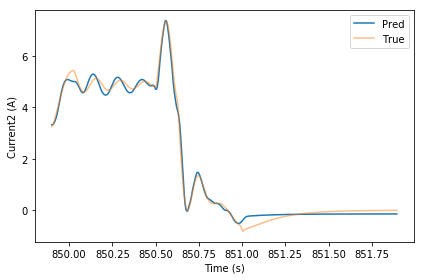

In [180]:
# plt.plot(time[start:end], (c2_true[start:end] - c2_pred[start:end]))
# plt.ylim(-13,13)
# plt.ylabel('Error (A)')
# plt.xlabel('Time (s)')
# plt.tight_layout()
# plt.savefig('../docs/pres2/images/current2_error_vs_time.pdf',dpi=500,quality=100)

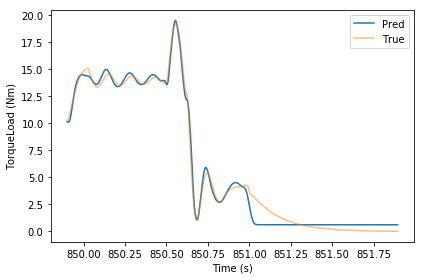

In [182]:
# plt.plot(time[start:end], (t_true[start:end] - t_pred[start:end]))
# plt.ylim(-35,35)
# plt.ylabel('Error (Nm)')
# plt.tight_layout()
# plt.xlabel('Time (s)')
# plt.tight_layout()
# plt.savefig('../docs/pres2/images/torque_error_vs_time.pdf',dpi=500,quality=100)

In [183]:
rtime = np.asarray([[0.005 * x] for x in range(current['Current'].shape[0])])

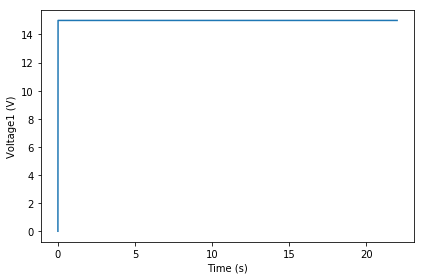

In [314]:
plt.plot(rtime[start:end], dataset[start:end, 0])
plt.ylabel('Voltage1 (V)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/voltage1_vs_time.pdf',dpi=500,quality=100)

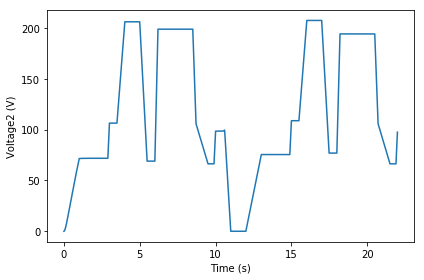

In [315]:
plt.plot(rtime[start:end], dataset[start:end, 1])
plt.ylabel('Voltage2 (V)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/voltage2_vs_time.pdf',dpi=500,quality=100)

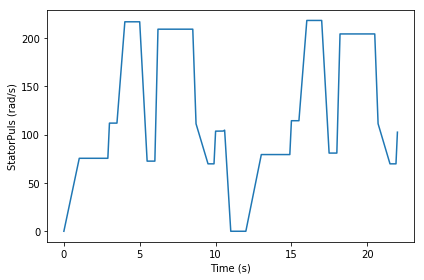

In [316]:
plt.plot(rtime[start:end], dataset[start:end, 2])
plt.ylabel('StatorPuls (rad/s)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/statorpuls_vs_time.pdf',dpi=500,quality=100)

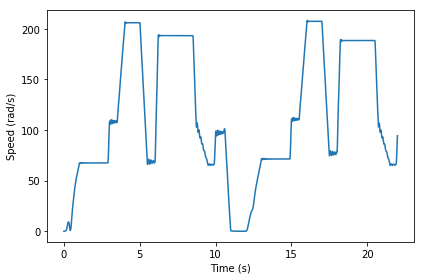

In [317]:
plt.plot(rtime[start:end], dataset[start:end, 3])
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/speed_vs_time.pdf',dpi=500,quality=100)

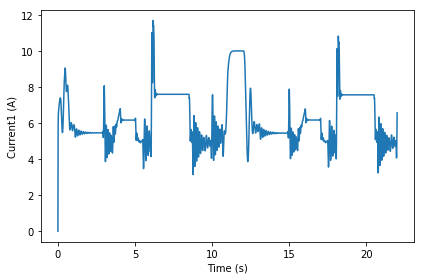

In [318]:
plt.plot(rtime[start:end], dataset[start:end, 4])
plt.ylabel('Current1 (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/current1_vs_time.pdf',dpi=500,quality=100)

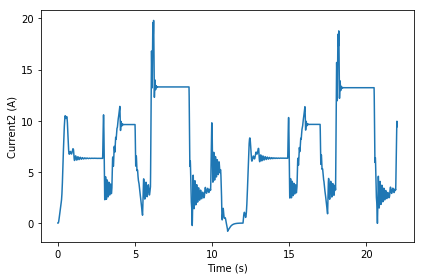

In [319]:
plt.plot(rtime[start:end], dataset[start:end, 5])
plt.ylabel('Current2 (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/current2_vs_time.pdf',dpi=500,quality=100)

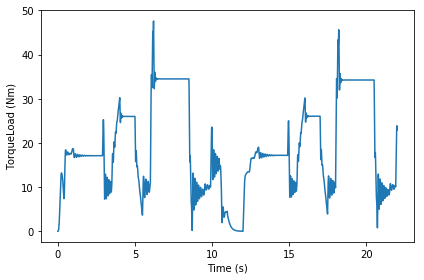

In [320]:
plt.plot(rtime[start:end], dataset[start:end, 6])
plt.ylabel('TorqueLoad (Nm)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/torqueload_vs_time.pdf',dpi=500,quality=100)

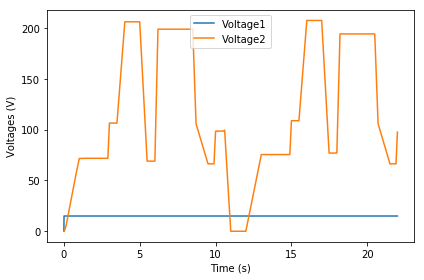

In [321]:
plt.plot(rtime[start:end], dataset[start:end, 0], label='Voltage1')
plt.plot(rtime[start:end], dataset[start:end, 1], label='Voltage2')
plt.legend()
plt.ylabel('Voltages (V)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/voltages_vs_time.pdf',dpi=500,quality=100)

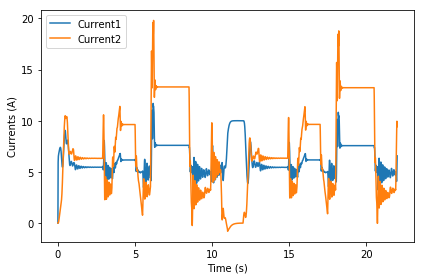

In [322]:
plt.plot(rtime[start:end], dataset[start:end, 4], label='Current1')
plt.plot(rtime[start:end], dataset[start:end, 5], label='Current2')
plt.legend()
plt.ylabel('Currents (A)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('../docs/pres2/images/currents_vs_time.pdf',dpi=500,quality=100)

In [358]:
results = {'current1_true':c1_true, 'current1_pred':c1_pred, 
           'current2_true': c2_true, 'current2_pred': c2_pred, 
           'torqueload_true': t_true, 'torqueload_pred': t_pred,
          'voltage1_true':v1_true, 'voltage2_true':v2_true, 
           'statorpuls_true':sp_true, 'speed_true': s_true,
           'time':time}

In [359]:
sio.savemat('../datasets/deconv_results.mat', results)

In [12]:
i = 0
start = int(i / 0.005)
end = int((i+1) / 0.005)

print (start, end)

0 200


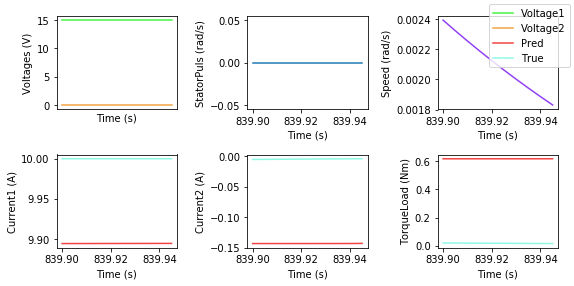

In [25]:

fig = plt.figure(figsize=(8, 4)) 
fig.add_axes([0, 0, 1, 1])

plt.subplot(2,3,1)
plt.plot(time[i:i+10], v1_true[i:i+10], label='Voltage1', color='#44f441')
plt.plot(time[i:i+10], v2_true[i:i+10], label='Voltage2', color='#f4a341')
plt.ylabel('Voltages (V)')
plt.xlabel('Time (s)')
plt.xticks([])

plt.subplot(2,3,2)
plt.plot(time[i:i+10], sp_true[i:i+10])
plt.ylabel('StatorPuls (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2,3,3)
plt.plot(time[i:i+10], s_true[i:i+10], color='#9141f4')
plt.ylabel('Speed (rad/s)')
plt.xlabel('Time (s)')

plt.subplot(2,3,4)
plt.plot(time[i:i+10], c1_pred[i:i+10], color='#f44141')
plt.plot(time[i:i+10], c1_true[i:i+10], color='#41f4d3', alpha=0.6)
plt.ylabel('Current1 (A)')
plt.xlabel('Time (s)')

plt.subplot(2,3,5)
plt.plot(time[i:i+10], c2_pred[i:i+10], color='#f44141')
plt.plot(time[i:i+10], c2_true[i:i+10], color='#41f4d3', alpha=0.6)
plt.ylabel('Current2 (A)')
plt.xlabel('Time (s)')

plt.subplot(2,3,6)
plt.plot(time[i:i+10], t_pred[i:i+10], label='Pred', color='#f44141')
plt.plot(time[i:i+10], t_true[i:i+10], label='True', color='#41f4d3', alpha=0.6)
plt.ylabel('TorqueLoad (Nm)')
plt.xlabel('Time (s)')

fig.legend(loc='upper right')
plt.tight_layout()
    
#     plt.show()

In [16]:
print (v1_true.min(), v1_true.max())
print (v2_true.min(), v2_true.max())
print (sp_true.min(), sp_true.max())
print (s_true.min(), s_true.max())
print (c1_true.min(), c1_true.max())
print (c2_true.min(), c2_true.max())
print (t_true.min(), t_true.max())

15.0 15.0
0.0 298.45130209101796
0.0 314.1592653589793
0.0012024587136587098 302.8331102389342
2.6897755042457616 10.394259224442973
-0.8313249352744009 16.79146198631963
-1.6759037589455739 38.557430106723245


In [28]:
import imageio
import os
import cv2

In [38]:
imgs = os.listdir('../datasets/plot_anim/')
imgs.sort()

img_ds = []
for img_name in imgs[:100]:
    img_ds.append(cv2.imread('../datasets/plot_anim/' + img_name))

In [39]:
imageio.mimsave('../docs/motor_physics.gif', img_ds, duration=0.0000001)